# Fake News Classifier using Bag of Words

In this project we will be creating a Fake news classifier model that will classify the news based on the title, whether it is 'Real' or 'Fake'. The dataset that we are using here is taken from www.kaggle.com and comprises of following features Id, Title, Author, Text and Label. Firstly we will preprocess the text data by using stemming and stopwords followed by using Bag of Words to convert text into vectors. Finally creating models and evaluating their performances.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import itertools

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

## Importing the dataset

In [2]:
# reading the data
data = pd.read_csv('news_data.csv')

In [3]:
# visualizing the data
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# observing the number of records
data.shape

(20800, 5)

In [5]:
# checking for Nan values
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Here it can be observed that we are Nan values in our dataset, but as it is a text dataset so performing feature engineering is not viable so we can drop the Nan values.
Incase of 'Author' we can handle Nan values by replacing the Nan values with 'Anonymous'.

In [6]:
# handling Nan values in Author column
data['author'].fillna('Anonymous', inplace = True)

As the Nan value of Author column has been handled now we can drop other records having Nan values.

In [7]:
data.dropna(inplace = True)

In [8]:
# checking for Nan values
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

## Creating dependent and independent features

In [9]:
# independent features
X = data.drop('label', axis = 1)

In [10]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
# dependent feature
Y = data['label']

In [12]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Text Preprocessing

In [13]:
# creating a copy of dataset for text preprocessing
messages = X.copy()

In [14]:
# resetting the index 
messages.reset_index(inplace = True)

In [15]:
# removing the stopwords from title column
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
# observing the corpus created
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [17]:
# Applying CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [18]:
# observing the features created
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [19]:
# observing the parameters
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## Splitting data into train and test dataset

In [20]:
# splitting data in train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [21]:
print(x_train.shape,' ',y_train.shape)
print(x_test.shape,' ',y_test.shape)

(14142, 5000)   (14142,)
(6061, 5000)   (6061,)


In [22]:
# visualizing the x_train data in a dataframe
df = pd.DataFrame(x_train, columns = cv.get_feature_names())
df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Function to plot Confusion matrix

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [24]:
# creating MultinomialNB object
classifier = MultinomialNB()

In [25]:
# fitting the data to model
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)

In [26]:
# obtaining Accuracy Score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

Accuracy: 0.905


Confusion matrix, without normalization


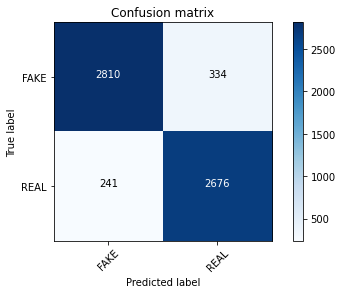

In [27]:
# Visualizing the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

## Passive Aggressive Classifier Algorithm

In [28]:
# creating MultinomialNB object
classifier = PassiveAggressiveClassifier(max_iter = 50)

In [29]:
# fitting the data to model
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)

In [30]:
# obtaining Accuracy Score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

Accuracy: 0.916


Confusion matrix, without normalization


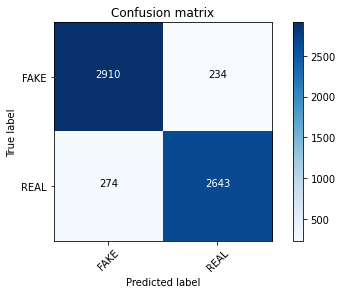

In [31]:
# Visualizing the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

## MultinomialNB Algorithm with Hyperparameter

In [32]:
# creating MultinomialNB object
classifier = MultinomialNB(alpha = 0.1)

In [33]:
# comparing the scores for different alpha values
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    if score > previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8955617884837486
Alpha: 0.1, Score : 0.9046361986470879
Alpha: 0.2, Score : 0.904801187922785
Alpha: 0.30000000000000004, Score : 0.9046361986470879
Alpha: 0.4, Score : 0.9039762415442997
Alpha: 0.5, Score : 0.9038112522686026
Alpha: 0.6000000000000001, Score : 0.9044712093713908
Alpha: 0.7000000000000001, Score : 0.9044712093713908
Alpha: 0.8, Score : 0.9052961557498762
Alpha: 0.9, Score : 0.9051311664741791


### Identifying Top 20 most Real and Fake words

In [34]:
## Get Features names
feature_names = cv.get_feature_names()

In [35]:
# Most Real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.9967278171482024, 'trump'),
 (-4.3045214902271836, 'hillari'),
 (-4.371910192429305, 'clinton'),
 (-4.856618072163229, 'elect'),
 (-5.159116379655692, 'new'),
 (-5.1973497716807096, 'us'),
 (-5.359162075097498, 'video'),
 (-5.394130672935245, 'war'),
 (-5.410073617237618, 'comment'),
 (-5.426274862653043, 'hillari clinton'),
 (-5.442742916990339, 'fbi'),
 (-5.446902656765515, 'news'),
 (-5.515925303006456, 'vote'),
 (-5.524897996672617, 'russia'),
 (-5.533951929050449, 'email'),
 (-5.585269158048645, 'america'),
 (-5.594889241859667, 'world'),
 (-5.649520501660669, 'obama'),
 (-5.707309688218086, 'donald'),
 (-5.768644405250927, 'donald trump')]

In [36]:
# Most Fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-11.032485342268991, 'abroad'),
 (-11.032485342268991, 'abus new'),
 (-11.032485342268991, 'abus new york'),
 (-11.032485342268991, 'act new'),
 (-11.032485342268991, 'act new york'),
 (-11.032485342268991, 'advic'),
 (-11.032485342268991, 'advis new'),
 (-11.032485342268991, 'advis new york'),
 (-11.032485342268991, 'age new'),
 (-11.032485342268991, 'age new york'),
 (-11.032485342268991, 'agenda breitbart'),
 (-11.032485342268991, 'ahead trump'),
 (-11.032485342268991, 'airlin'),
 (-11.032485342268991, 'aleppo new'),
 (-11.032485342268991, 'aleppo new york'),
 (-11.032485342268991, 'ali'),
 (-11.032485342268991, 'allegedli'),
 (-11.032485342268991, 'america breitbart'),
 (-11.032485342268991, 'america new'),
 (-11.032485342268991, 'america new york')]